<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Thu Oct 23 07:27:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.88                 Driver Version: 580.88         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              4W /   60W |     475MiB /   4096MiB |     69%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)
device = torch.device("cuda:0")
# TODO: Setup device agnostic code


2.8.0+cu129


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torch
from torchvision import transforms

In [5]:
from torchvision.datasets import MNIST
train_data = MNIST(root = '.',
                   download=False,
                   train = True,
                   transform = transforms.ToTensor())
test_data = MNIST(root = '.',
                    download=False,
                    train = False,
                    transform = transforms.ToTensor())

In [6]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader
bs = 32
train_DL = DataLoader(train_data, batch_size=bs, shuffle = True)
test_DL = DataLoader(test_data, batch_size=bs, shuffle = False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
from torch import nn
class TinyVGG(nn.Module):
    def __init__(self, input, output, kernel):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input,
                      out_channels=kernel,
                      kernel_size=3,
                      padding = 'same',
                      stride = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=kernel,
                      out_channels=kernel,
                      kernel_size=3,
                      padding = 'same',
                      stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 32, 16, 14, 14
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(kernel,
                      kernel,
                      kernel_size=3,
                      padding='same'),
            nn.ReLU(),
            nn.Conv2d(kernel,
                      kernel,
                      kernel_size=3,
                      padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2) # 32, 16, 7, 7
        )
        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(kernel*7*7, 10)
        )
    def forward(self, X) :
        X = self.block_1(X)
        X = self.block_2(X)
        X = self.classification(X)
        return X

In [9]:
class_names = train_data.classes
len(class_names)

10

In [10]:
model_0 = TinyVGG(1, len(class_names), 10)
model_0.to(device)

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [11]:
from torchmetrics import F1Score
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
f1 = F1Score(task = 'multiclass', num_classes=len(class_names), average='macro')
f1 = f1.to(device)

In [12]:
loss_curve = []
accuracy_curve = {}
def train_loop(model, data, loss_fn, optim) :
    model.train()
    f1.reset()
    for batch,(X,y) in enumerate(data):
        X,y = X.to(device), y.to(device)
        logits = model(X)
        loss = loss_fn(logits, y)
        f1.update(torch.softmax(logits, dim=1), y)

        optim.zero_grad()
        loss.backward()
        optim.step()
        
        if (batch%400==0) :
            loss_curve.append(loss_fn(logits, y).item())
            accuracy_curve[batch] = f1.compute().item()*100
        if (batch%400 == 0) :
            print(f"Batch {batch}/{len(data)} || Train Loss: {loss} || Accuracy: {f1.compute()*100}%")
  
def test_loop(model, data, loss_fn) :
    model.eval()
    loss = 0 
    f1.reset()
    with torch.inference_mode():
        for batch,(X,y) in enumerate(data):
            X,y = X.to(device), y.to(device)
            logits = model(X)
            loss+=loss_fn(logits, y).item()
            f1.update(torch.softmax(logits, dim=1),y)
    print(f"Loss: {loss/len(data)} || Accuracy: {f1.compute()*100}%")

In [13]:
img = train_data[0][0].to(device)
print(torch.softmax(model_0(img.unsqueeze(0)), dim = 1))

tensor([[0.1019, 0.0975, 0.1006, 0.1070, 0.1025, 0.0960, 0.0985, 0.0988, 0.1003,
         0.0969]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [14]:
epochs = 3
for epoch in range(epochs) :
    train_loop(model_0, train_DL, loss_fn, optim)
    test_loop(model_0, test_DL, loss_fn)

Batch 0/1875 || Train Loss: 2.3020334243774414 || Accuracy: 1.7142858505249023%
Batch 400/1875 || Train Loss: 0.09857432544231415 || Accuracy: 82.46830749511719%
Batch 800/1875 || Train Loss: 0.10224664211273193 || Accuracy: 89.07157135009766%
Batch 1200/1875 || Train Loss: 0.06363437324762344 || Accuracy: 91.57804107666016%
Batch 1600/1875 || Train Loss: 0.11109934002161026 || Accuracy: 92.97063446044922%
Loss: 0.06860935397994014 || Accuracy: 97.80445861816406%
Batch 0/1875 || Train Loss: 0.08316045999526978 || Accuracy: 96.5714340209961%
Batch 400/1875 || Train Loss: 0.055352650582790375 || Accuracy: 97.70814514160156%
Batch 800/1875 || Train Loss: 0.019763469696044922 || Accuracy: 97.82231140136719%
Batch 1200/1875 || Train Loss: 0.005783669650554657 || Accuracy: 97.90399169921875%
Batch 1600/1875 || Train Loss: 0.008477014489471912 || Accuracy: 97.94818115234375%
Loss: 0.053226437705809614 || Accuracy: 98.36505889892578%
Batch 0/1875 || Train Loss: 0.13119466602802277 || Accuracy:

In [15]:
accuracy_curve.keys(), accuracy_curve.values()

(dict_keys([0, 400, 800, 1200, 1600]),
 dict_values([89.90476131439209, 98.36357831954956, 98.31942319869995, 98.28991889953613, 98.34709167480469]))

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

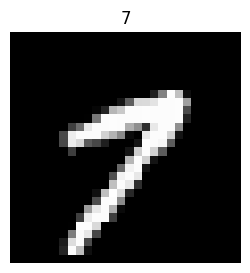

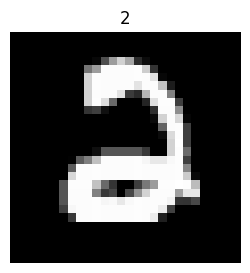

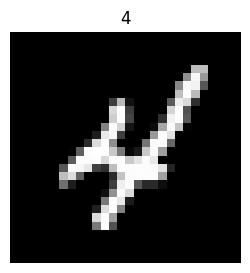

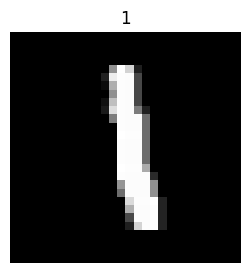

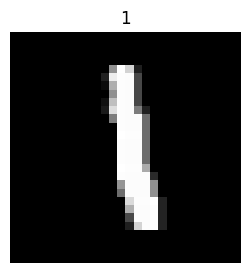

In [16]:
import numpy as np
import matplotlib.pyplot as plt
random_idx = np.random.randint(0, 100, 5)
for i in random_idx:
    plt.figure(figsize=(3,3))
    plt.imshow(train_data[i][0].squeeze(), cmap='gray')
    with torch.inference_mode():
        logits = model_0(train_data[i][0].unsqueeze(1).to(device))
        label = logits.argmax(1).item() 
    plt.title(label)
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [17]:
model_0.eval()
preds = []
with torch.inference_mode():
    for X,y in test_DL:
        X,y = X.to(device), y.to(device)
        logits = model_0(X)
        preds.append(logits.argmax(1).to('cpu'))

In [18]:
preds = torch.concat(preds)

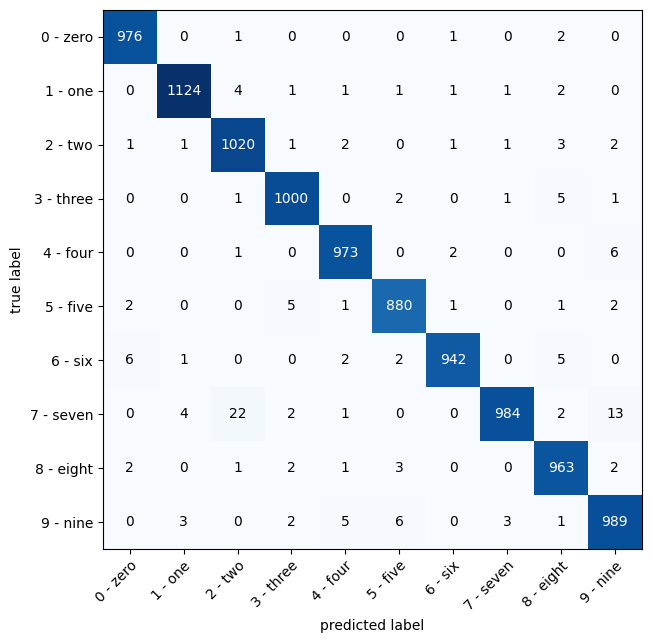

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix
confmat = ConfusionMatrix(task = 'multiclass', num_classes=len(class_names))
confmat_data = confmat(preds, test_data.targets)
fig, ax = plot_confusion_matrix(confmat_data.numpy(),
                                figsize=(10,7),
                                class_names = class_names
                                )
count = {}
prediction = {}
label = test_data.targets
# for i in label :
#     id = i.item()
#     if (id not in count):
#         count[id]=0
#     count[id] += 1
# for i in preds :
#     id = i.item()
#     if (id not in prediction):
#         prediction[id]=0
#     prediction[id] += 1
for i in range(10):
    prediction[i] = torch.sum(preds==i)
    count[i] = torch.sum(label==i)


In [23]:
TP = {}
accurate = []
for i in range(10) :
    TP[i] = torch.sum((preds == i) & (test_data.targets == i)).item()
    accurate.append(TP[i]*100/count[i].item())
    print(f"sai so du doan cua {i} la: {TP[i]*100/count[i]}%")


sai so du doan cua 0 la: 99.59183502197266%
sai so du doan cua 1 la: 99.03083801269531%
sai so du doan cua 2 la: 98.83721160888672%
sai so du doan cua 3 la: 99.00990295410156%
sai so du doan cua 4 la: 99.08351135253906%
sai so du doan cua 5 la: 98.65471649169922%
sai so du doan cua 6 la: 98.3298568725586%
sai so du doan cua 7 la: 95.71984100341797%
sai so du doan cua 8 la: 98.87064361572266%
sai so du doan cua 9 la: 98.0178451538086%


<Figure size 1000x700 with 0 Axes>

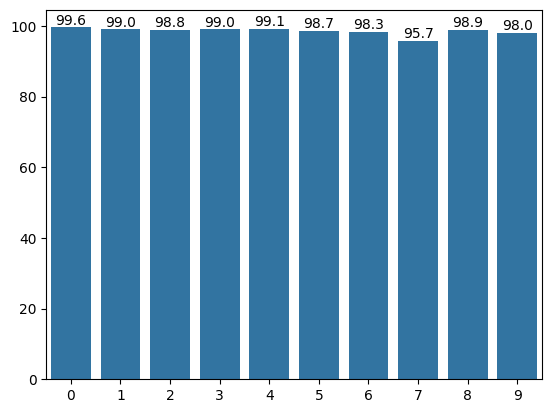

In [24]:
import seaborn as sns
plt.figure(figsize=(10,7))
fig, ax = plt.subplots()
sns.barplot(x = np.arange(0,10,1), y = accurate, ax = ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random = torch.randn(size = (3,64,64)).unsqueeze(1)
layer = nn.Conv2d(in_channels=1, out_channels=5,
                  kernel_size=3,
                  stride=2,
                  padding = 1)
layer(random).shape

torch.Size([3, 5, 32, 32])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?